In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
#loading the .csv data
data = pd.read_csv('data/data_problem2.csv', delimiter=',', header=None)

#features and labels
# data.columns = ['Feature', 'Class']
#report general information about the data
print(data.info())
print(data.describe())
# print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 3600 entries, 0 to 3599
dtypes: float64(3600)
memory usage: 56.4 KB
None
           0         1          2         3          4         5         6     \
count  2.000000  2.000000   2.000000  2.000000   2.000000  2.000000  2.000000   
mean   4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
std    5.588709  6.326325   9.516520  6.126778   9.483907  6.322957  5.084159   
min    1.000000  1.000000   1.000000  1.000000   1.000000  1.000000  0.000000   
25%    2.975907  3.236694   4.364598  3.166143   4.353067  3.235503  1.797522   
50%    4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
75%    6.927721  7.710081  11.093794  7.498429  11.059202  7.706509  5.392565   
max    8.903629  9.946774  14.458392  9.664572  14.412270  9.942011  7.190087   

           7         8          9     ...      3590      3591      3592  \
count  2.000000  2.000000   2.000000  ...  2.

In [4]:
#plotting histograms of the data
data.hist(bins=50, figsize=(20,15))
plt.show()


KeyboardInterrupt: 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (adjust the parameters based on your data file)
data = pd.read_csv('data/data_problem2.csv', delimiter=',', header=None)

# transpose the DataFrame
data = data.T.reset_index(drop=True)

# Assign column names
data.columns = ['Feature', 'Class']

# Convert columns to appropriate data types
data['Feature'] = data['Feature'].values
data['Class'] = data['Class'].values

# Verify the data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  3600 non-null   float64
 1   Class    3600 non-null   float64
dtypes: float64(2)
memory usage: 56.4 KB
None
     Feature  Class
0   8.903629    1.0
1   9.946774    1.0
2  14.458392    1.0
3   9.664572    1.0
4  14.412270    1.0


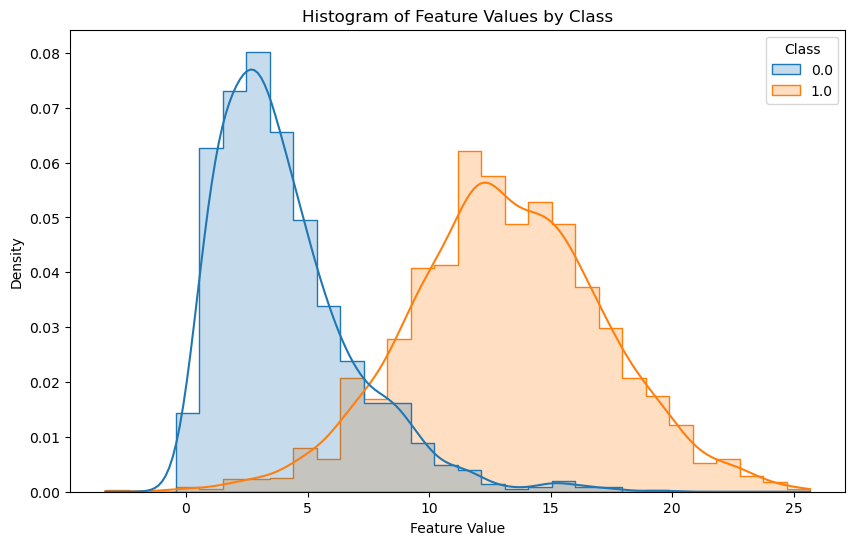

In [12]:
# Step 2: Plot Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Feature', hue='Class', bins=30, kde=True, element='step', stat='density')
plt.title('Histogram of Feature Values by Class')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()


In [13]:
# Step 3: Split the Data
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
split_ratio = 0.8
split_index = int(len(data_shuffled) * split_ratio)

train_data = data_shuffled.iloc[:split_index]
X_train = train_data['Feature'].values
y_train = train_data['Class'].values

test_data = data_shuffled.iloc[split_index:]
X_test = test_data['Feature'].values
y_test = test_data['Class'].values

# Class Proportions
print("\nTraining Class Distribution:")
print(train_data['Class'].value_counts(normalize=True))

print("\nTest Class Distribution:")
print(test_data['Class'].value_counts(normalize=True))


Training Class Distribution:
Class
1.0    0.552778
0.0    0.447222
Name: proportion, dtype: float64

Test Class Distribution:
Class
1.0    0.566667
0.0    0.433333
Name: proportion, dtype: float64


In [14]:

# Step 4: Estimate Parameters
alpha = 2  # Given
X_train_c0 = X_train[y_train == 0]
n0 = len(X_train_c0)
beta_hat = np.sum(X_train_c0) / (n0 * alpha)
print(f"\nEstimated beta for Class 0 (Gamma): {beta_hat}")

X_train_c1 = X_train[y_train == 1]
n1 = len(X_train_c1)
mu_hat = np.mean(X_train_c1)
sigma_squared_hat = np.var(X_train_c1, ddof=0)
sigma_hat = np.sqrt(sigma_squared_hat)
print(f"Estimated mu for Class 1 (Gaussian): {mu_hat}")
print(f"Estimated sigma for Class 1 (Gaussian): {sigma_hat}")



Estimated beta for Class 0 (Gamma): 2.0491408491467307
Estimated mu for Class 1 (Gaussian): 13.137982784521945
Estimated sigma for Class 1 (Gaussian): 4.057052585430489


In [15]:
# Step 5: Define PDFs
def gamma_pdf(x, alpha, beta):
    gamma_alpha = 1  # Since (2 - 1)! = 1! = 1
    x = np.maximum(x, 1e-10)
    coef = (1 / (beta ** alpha * gamma_alpha))
    pdf = coef * x ** (alpha - 1) * np.exp(-x / beta)
    return pdf

def gaussian_pdf(x, mu, sigma):
    coef = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    pdf = coef * np.exp(exponent)
    return pdf

In [16]:
# Step 6: Implement Classifier
prior_c0 = np.mean(y_train == 0)
prior_c1 = np.mean(y_train == 1)
print(f"\nClass Prior for Class 0: {prior_c0}")
print(f"Class Prior for Class 1: {prior_c1}")

def bayes_classifier(x, alpha, beta, mu, sigma, prior_c0, prior_c1):
    likelihood_c0 = gamma_pdf(x, alpha, beta)
    likelihood_c1 = gaussian_pdf(x, mu, sigma)
    posterior_c0 = likelihood_c0 * prior_c0
    posterior_c1 = likelihood_c1 * prior_c1
    predictions = np.where(posterior_c0 > posterior_c1, 0, 1)
    return predictions


Class Prior for Class 0: 0.44722222222222224
Class Prior for Class 1: 0.5527777777777778


In [17]:
# Step 7: Make Predictions
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = bayes_classifier(X_test_reshaped.flatten(), alpha, beta_hat, mu_hat, sigma_hat, prior_c0, prior_c1)


In [18]:
# Step 8: Evaluate Classifier
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 91.81%


In [19]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
Predicted    0    1  All
Actual                  
0.0        273   39  312
1.0         20  388  408
All        293  427  720


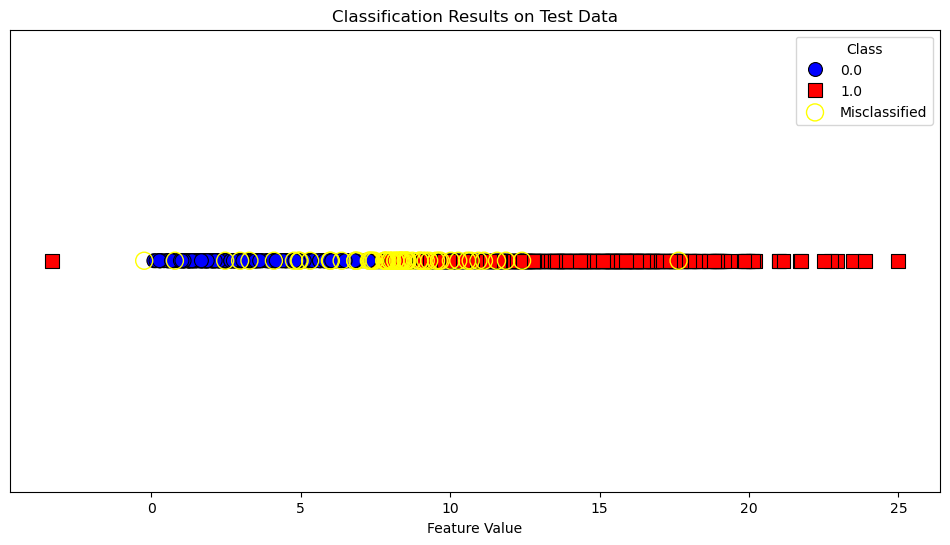

In [21]:
# Step 9: Analyze Misclassifications
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]
correct_indices = np.where(y_pred == y_test)[0]
correct_samples = X_test[correct_indices]
correct_labels = y_test[correct_indices]

plt.figure(figsize=(12, 6))

sns.scatterplot(x=correct_samples, y=np.zeros_like(correct_samples), hue=correct_labels, 
                palette={0: 'blue', 1: 'red'}, style=correct_labels, markers={0: 'o', 1: 's'}, 
                edgecolor='k', s=100, legend='full')

plt.scatter(misclassified_samples, np.zeros_like(misclassified_samples), 
            facecolors='none', edgecolors='yellow', s=150, label='Misclassified')

plt.xlabel('Feature Value')
plt.yticks([])
plt.legend(title='Class', loc='upper right')
plt.title('Classification Results on Test Data')
plt.show()


In [22]:
# Step 10: Additional Visualization
x_values = np.linspace(min(X), max(X), 1000)
gamma_pdf_values = gamma_pdf(x_values, alpha, beta_hat)
gaussian_pdf_values = gaussian_pdf(x_values, mu_hat, sigma_hat)

plt.figure(figsize=(12, 6))

sns.histplot(X_train_c0, bins=30, color='blue', alpha=0.5, stat='density', label='Class 0 Histogram')
sns.histplot(X_train_c1, bins=30, color='red', alpha=0.5, stat='density', label='Class 1 Histogram')

plt.plot(x_values, gamma_pdf_values, color='blue', label='Estimated Gamma PDF (Class 0)')
plt.plot(x_values, gaussian_pdf_values, color='red', label='Estimated Gaussian PDF (Class 1)')

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.title('Estimated PDFs and Histograms')
plt.show()

NameError: name 'X' is not defined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  3600 non-null   float64
 1   Class    3600 non-null   float64
dtypes: float64(2)
memory usage: 56.4 KB
None
           Feature        Class
count  3600.000000  3600.000000
mean      9.118580     0.555556
std       5.747397     0.496973
min      -3.310259     0.000000
25%       3.710522     0.000000
50%       9.091724     1.000000
75%      13.729211     1.000000
max      25.673673     1.000000

Class Counts:
Class
1.0    2000
0.0    1600
Name: count, dtype: int64


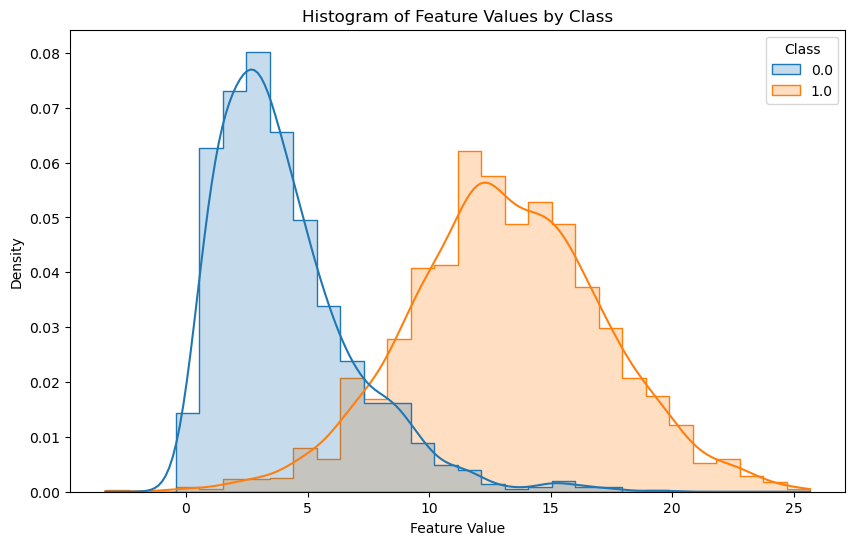


Training Class Distribution:
Class
1.0    0.552778
0.0    0.447222
Name: proportion, dtype: float64

Test Class Distribution:
Class
1.0    0.566667
0.0    0.433333
Name: proportion, dtype: float64
Estimated beta for Class 0 (Gamma): 2.0491408491467307
Estimated mu for Class 1 (Gaussian): 13.137982784521945
Estimated sigma for Class 1 (Gaussian): 4.057052585430489

Class Prior for Class 0: 0.44722222222222224
Class Prior for Class 1: 0.5527777777777778

Test Accuracy: 91.81%

Confusion Matrix:
Predicted    0    1  All
Actual                  
0.0        273   39  312
1.0         20  388  408
All        293  427  720


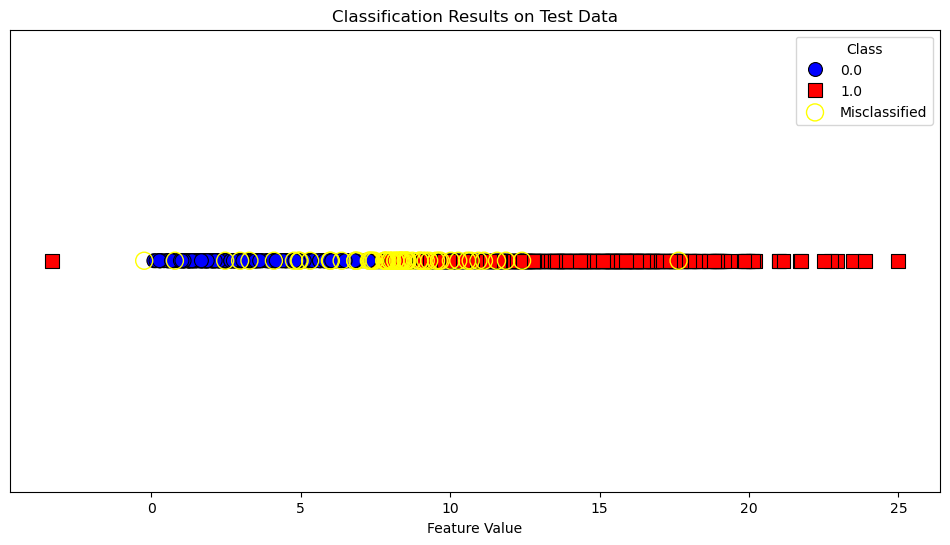

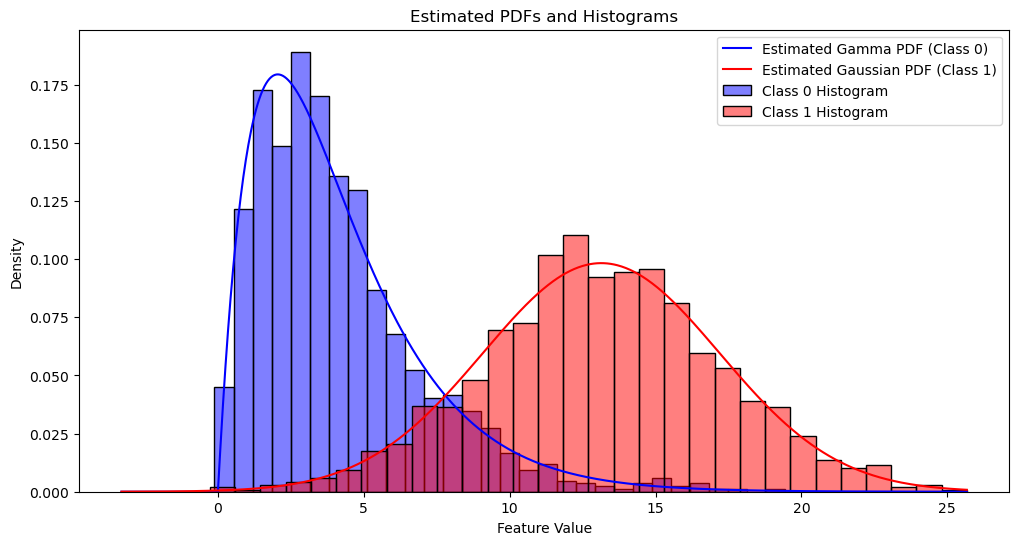

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Data
data = pd.read_csv('data/data_problem2.csv',delimiter=',', header=None)
data = data.T.reset_index(drop=True)
data.columns = ['Feature', 'Class']

# General Information
print(data.info())
print(data.describe())

# Class Counts
class_counts = data['Class'].value_counts()
print("\nClass Counts:")
print(class_counts)

# Features and Labels
X = data['Feature'].values
y = data['Class'].values

# Step 2: Plot Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Feature', hue='Class', bins=30, kde=True, element='step', stat='density')
plt.title('Histogram of Feature Values by Class')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()

# Step 3: Split the Data
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
split_ratio = 0.8
split_index = int(len(data_shuffled) * split_ratio)

train_data = data_shuffled.iloc[:split_index]
X_train = train_data['Feature'].values
y_train = train_data['Class'].values

test_data = data_shuffled.iloc[split_index:]
X_test = test_data['Feature'].values
y_test = test_data['Class'].values

# Class Proportions
print("\nTraining Class Distribution:")
print(train_data['Class'].value_counts(normalize=True))

print("\nTest Class Distribution:")
print(test_data['Class'].value_counts(normalize=True))

# # Step 4: Estimate Parameters

# # Gaussian distribution for Class 0
# alpha = 2  # Given
# X_train_c0 = X_train[y_train == 0]
# n0 = len(X_train_c0)
# beta_hat = np.sum(X_train_c0) / (n0 * alpha)
# print(f"\nEstimated beta for Class 0 (Gamma): {beta_hat}")

# # Gamma distribution for Class 1
# X_train_c1 = X_train[y_train == 1]
# n1 = len(X_train_c1)
# mu_hat = np.mean(X_train_c1)
# sigma_squared_hat = np.var(X_train_c1, ddof=0)
# sigma_hat = np.sqrt(sigma_squared_hat)
# print(f"Estimated mu for Class 1 (Gaussian): {mu_hat}")
# print(f"Estimated sigma for Class 1 (Gaussian): {sigma_hat}")

# # Step 5: Define PDFs
# def gamma_pdf(x, alpha, beta):
#     gamma_alpha = 1  # Since (2 - 1)! = 1! = 1
#     x = np.maximum(x, 1e-10)
#     coef = (1 / (beta ** alpha * gamma_alpha))
#     pdf = coef * x ** (alpha - 1) * np.exp(-x / beta)
#     return pdf

# def gaussian_pdf(x, mu, sigma):
#     coef = 1 / (sigma * np.sqrt(2 * np.pi))
#     exponent = -0.5 * ((x - mu) / sigma) ** 2
#     pdf = coef * np.exp(exponent)
#     return pdf

# Step 4: Estimate Parameters

# Gamma distribution for Class 0
alpha = 2  # Given shape parameter
X_train_c0 = X_train[y_train == 0]
n0 = len(X_train_c0)
beta_hat = np.mean(X_train_c0) / alpha  # Estimate beta
print(f"Estimated beta for Class 0 (Gamma): {beta_hat}")

# Gaussian distribution for Class 1
X_train_c1 = X_train[y_train == 1]
n1 = len(X_train_c1)
mu_hat = np.mean(X_train_c1)  # Estimate mu
sigma_squared_hat = np.var(X_train_c1, ddof=0)  # Estimate sigma^2
sigma_hat = np.sqrt(sigma_squared_hat)  # Estimate sigma
print(f"Estimated mu for Class 1 (Gaussian): {mu_hat}")
print(f"Estimated sigma for Class 1 (Gaussian): {sigma_hat}")

# Step 5: Define PDFs
def gamma_pdf(x, alpha, beta):
    # Since alpha = 2, Gamma(alpha) = 1
    x = np.maximum(x, 1e-10)  # Ensure x > 0
    coef = 1 / (beta ** alpha)  # Simplified coefficient
    pdf = coef * x ** (alpha - 1) * np.exp(-x / beta)
    return pdf

def gaussian_pdf(x, mu, sigma):
    coef = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    pdf = coef * np.exp(exponent)
    return pdf


# Step 6: Implement Classifier
prior_c0 = np.mean(y_train == 0)
prior_c1 = np.mean(y_train == 1)
print(f"\nClass Prior for Class 0: {prior_c0}")
print(f"Class Prior for Class 1: {prior_c1}")

def bayes_classifier(x, alpha, beta, mu, sigma, prior_c0, prior_c1):
    likelihood_c0 = gamma_pdf(x, alpha, beta)
    likelihood_c1 = gaussian_pdf(x, mu, sigma)
    posterior_c0 = likelihood_c0 * prior_c0
    posterior_c1 = likelihood_c1 * prior_c1
    predictions = np.where(posterior_c0 > posterior_c1, 0, 1)
    return predictions
# def bayes_classifier(x, alpha, beta, mu, sigma, prior_c0, prior_c1):
#     log_likelihood_c0 = np.log(gamma_pdf(x, alpha, beta) + 1e-300)
#     log_likelihood_c1 = np.log(gaussian_pdf(x, mu, sigma) + 1e-300)
#     log_posterior_c0 = log_likelihood_c0 + np.log(prior_c0)
#     log_posterior_c1 = log_likelihood_c1 + np.log(prior_c1)
#     predictions = np.where(log_posterior_c0 > log_posterior_c1, 0, 1)
#     return predictions

# Step 7: Make Predictions
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = bayes_classifier(X_test_reshaped.flatten(), alpha, beta_hat, mu_hat, sigma_hat, prior_c0, prior_c1)

# Step 8: Evaluate Classifier
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix:")
print(confusion_matrix)

# Step 9: Analyze Misclassifications
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]
correct_indices = np.where(y_pred == y_test)[0]
correct_samples = X_test[correct_indices]
correct_labels = y_test[correct_indices]

plt.figure(figsize=(12, 6))

sns.scatterplot(x=correct_samples, y=np.zeros_like(correct_samples), hue=correct_labels, 
                palette={0: 'blue', 1: 'red'}, style=correct_labels, markers={0: 'o', 1: 's'}, 
                edgecolor='k', s=100, legend='full')

plt.scatter(misclassified_samples, np.zeros_like(misclassified_samples), 
            facecolors='none', edgecolors='yellow', s=150, label='Misclassified')

plt.xlabel('Feature Value')
plt.yticks([])
plt.legend(title='Class', loc='upper right')
plt.title('Classification Results on Test Data')
plt.show()

# Step 10: Additional Visualization
x_values = np.linspace(min(X), max(X), 1000)
gamma_pdf_values = gamma_pdf(x_values, alpha, beta_hat)
gaussian_pdf_values = gaussian_pdf(x_values, mu_hat, sigma_hat)

plt.figure(figsize=(12, 6))

sns.histplot(X_train_c0, bins=30, color='blue', alpha=0.5, stat='density', label='Class 0 Histogram')
sns.histplot(X_train_c1, bins=30, color='red', alpha=0.5, stat='density', label='Class 1 Histogram')

plt.plot(x_values, gamma_pdf_values, color='blue', label='Estimated Gamma PDF (Class 0)')
plt.plot(x_values, gaussian_pdf_values, color='red', label='Estimated Gaussian PDF (Class 1)')

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.title('Estimated PDFs and Histograms')
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[273  39]
 [ 20 388]]


In [28]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Precision for Class 1: {precision:.2f}")
print(f"Recall for Class 1: {recall:.2f}")
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score for Class 1: {f1:.2f}")


Precision for Class 1: 0.91
Recall for Class 1: 0.95
F1-Score for Class 1: 0.93


In [30]:
# Step 6: Implement Classifier
prior_c0 = np.mean(y_train == 0)
prior_c1 = np.mean(y_train == 1)
print(f"\nClass Prior for Class 0: {prior_c0}")
print(f"Class Prior for Class 1: {prior_c1}")

def bayes_classifier(x, alpha, beta, mu, sigma, prior_c0, prior_c1):
    likelihood_c0 = gamma_pdf(x, alpha, beta)
    likelihood_c1 = gaussian_pdf(x, mu, sigma)
    posterior_c0 = likelihood_c0 * prior_c0
    posterior_c1 = likelihood_c1 * prior_c1
    predictions = np.where(posterior_c0 > posterior_c1, 0, 1)
    return predictions

# Make Predictions
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = bayes_classifier(X_test_reshaped.flatten(), alpha, beta_hat, mu_hat, sigma_hat, prior_c0, prior_c1)

# Evaluate Classifier
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix:")
print(confusion_matrix)



Class Prior for Class 0: 0.44722222222222224
Class Prior for Class 1: 0.5527777777777778

Test Accuracy: 91.81%

Confusion Matrix:
Predicted    0    1  All
Actual                  
0.0        273   39  312
1.0         20  388  408
All        293  427  720


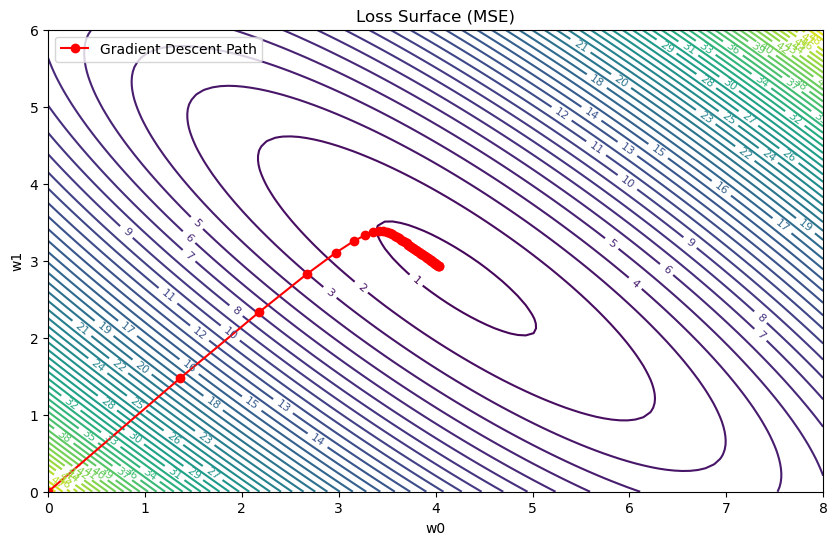

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
N = 100
x = 2 * np.random.rand(N)
y = 4 + 3 * x + np.random.randn(N)

# Define the loss function (MSE)
def mse_loss(w0, w1, x, y):
    y_pred = w0 + w1 * x
    return np.mean((y - y_pred) ** 2)

# Create a grid of weight values
w0_values = np.linspace(0, 8, 100)
w1_values = np.linspace(0, 6, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)
Loss = np.array([[mse_loss(w0, w1, x, y) for w0 in w0_values] for w1 in w1_values])


# Plot the loss surface
plt.figure(figsize=(10, 6))
CS = plt.contour(W0, W1, Loss, levels=50, cmap='viridis')
plt.clabel(CS, inline=1, fontsize=8)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Loss Surface (MSE)')
# Initialize weights
w0, w1 = 0.0, 0.0
learning_rate = 0.1
iterations = 50
w0_history = [w0]
w1_history = [w1]

# Gradient descent loop
for i in range(iterations):
    y_pred = w0 + w1 * x
    error = y_pred - y
    grad_w0 = (2 / N) * np.sum(error)
    grad_w1 = (2 / N) * np.sum(error * x)
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1
    w0_history.append(w0)
    w1_history.append(w1)

# Plot the trajectory
plt.plot(w0_history, w1_history, 'ro-', label='Gradient Descent Path')
plt.legend()
plt.show()

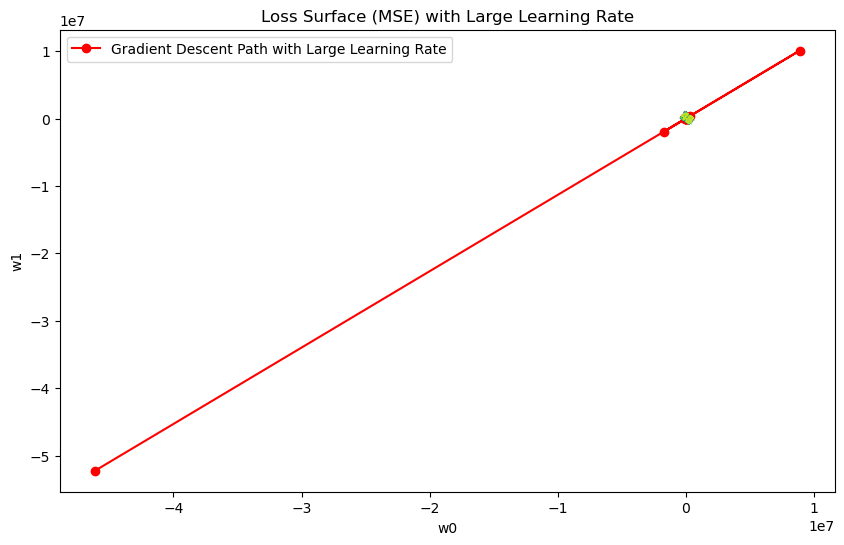

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
N = 100
x = 2 * np.random.rand(N)
y = 4 + 3 * x + np.random.randn(N)

# Define the loss function (MSE)
def mse_loss(w0, w1, x, y):
    y_pred = w0 + w1 * x
    return np.mean((y - y_pred) ** 2)

# Create a grid of weight values
w0_values = np.linspace(0, 8, 100)
w1_values = np.linspace(0, 6, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)
Loss = np.array([[mse_loss(w0, w1, x, y) for w0 in w0_values] for w1 in w1_values])


# # Plot the loss surface
# plt.figure(figsize=(10, 6))
# CS = plt.contour(W0, W1, Loss, levels=50, cmap='viridis')
# plt.clabel(CS, inline=1, fontsize=8)
# plt.xlabel('w0')
# plt.ylabel('w1')
# plt.title('Loss Surface (MSE)')
# Initialize weights
w0, w1 = 0.0, 0.0
learning_rate = 1.5  # Large learning rate
iterations = 10
w0_history = [w0]
w1_history = [w1]

# Gradient descent loop
for i in range(iterations):
    y_pred = w0 + w1 * x
    error = y_pred - y
    grad_w0 = (2 / N) * np.sum(error)
    grad_w1 = (2 / N) * np.sum(error * x)
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1
    w0_history.append(w0)
    w1_history.append(w1)

# Plot the trajectory
plt.figure(figsize=(10, 6))
CS = plt.contour(W0, W1, Loss, levels=50, cmap='viridis')
plt.clabel(CS, inline=1, fontsize=8)
plt.plot(w0_history, w1_history, 'ro-', label='Gradient Descent Path with Large Learning Rate')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Loss Surface (MSE) with Large Learning Rate')
plt.legend()
plt.show()